In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# Collecting Data
mta = pd.read_csv('mta_june.csv')

In [3]:
mta.head(5)

,Unnamed: 0,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS
0,0,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,00:00:00,REGULAR,7589159,2594185
1,1,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,04:00:00,REGULAR,7589165,2594190
2,2,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,08:00:00,REGULAR,7589174,2594207
3,3,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,12:00:00,REGULAR,7589214,2594253
4,4,A002,R051,02-00-00,59 ST,NQR456W,BMT,06/19/2021,16:00:00,REGULAR,7589300,2594278


In [4]:
mta.drop(['Unnamed: 0','C/A', 'LINENAME', 'DIVISION', 'DESC'], axis=1, inplace=True)

In [5]:
mta.head(5)

,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS
0,R051,02-00-00,59 ST,06/19/2021,00:00:00,7589159,2594185
1,R051,02-00-00,59 ST,06/19/2021,04:00:00,7589165,2594190
2,R051,02-00-00,59 ST,06/19/2021,08:00:00,7589174,2594207
3,R051,02-00-00,59 ST,06/19/2021,12:00:00,7589214,2594253
4,R051,02-00-00,59 ST,06/19/2021,16:00:00,7589300,2594278


In [6]:
mta.shape

(3079464, 7)

In [7]:
# Check if there are any duplicates in the complete dataset
mta.duplicated(keep='first').sum()

0

In [8]:
# Eliminate spaces in the columns
print(mta.columns)
mta.columns = mta.columns.str.strip()
print(mta.columns)

Index(['UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'ENTRIES',
       'EXITS                                                               '],
      dtype='object')
Index(['UNIT', 'SCP', 'STATION', 'DATE', 'TIME', 'ENTRIES', 'EXITS'], dtype='object')


In [9]:
# Check if there are any null values in the Dataset
mta.isna().sum()

UNIT       0
SCP        0
STATION    0
DATE       0
TIME       0
ENTRIES    0
EXITS      0
dtype: int64

In [10]:
# Concat DATE and TIME fields then change format to datetime
# Create DAY column to calculate daily turnstile traffic
mta['DATETIME'] = pd.to_datetime((mta['DATE']+" "+mta['TIME']),format="%m/%d/%Y %H:%M:%S")
mta['DATE'] = pd.to_datetime(mta['DATE'], format="%m/%d/%Y")
mta['DAY'] = mta['DATE'].dt.day_name()

In [11]:
mta.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3079464 entries, 0 to 3079463
Data columns (total 9 columns):
 #   Column    Dtype         
---  ------    -----         
 0   UNIT      object        
 1   SCP       object        
 2   STATION   object        
 3   DATE      datetime64[ns]
 4   TIME      object        
 5   ENTRIES   int64         
 6   EXITS     int64         
 7   DATETIME  datetime64[ns]
 8   DAY       object        
dtypes: datetime64[ns](2), int64(2), object(5)
memory usage: 211.5+ MB


In [12]:
mta['STATION'].nunique()

379

In [13]:
mta['STATION'].value_counts().sort_values(ascending=False).head(10)

34 ST-PENN STA     63148
FULTON ST          60805
GRD CNTRL-42 ST    47249
23 ST              45699
86 ST              37846
CANAL ST           36649
CHAMBERS ST        34484
34 ST-HERALD SQ    34158
59 ST              32745
42 ST-PORT AUTH    32209
Name: STATION, dtype: int64

In [14]:
mta_unique = mta.groupby(['UNIT','SCP'])[['STATION','DATETIME','ENTRIES','EXITS']].nunique()
print(">> Combination of UNIT and SCP fields is unique for a STATION  ", mta_unique[mta_unique.STATION != 1]['STATION'].sum())
print(">> So we come to know that combination of these fields correspond to Turnstile information")
print("\n",mta_unique)

>> Combination of UNIT and SCP fields is unique for a STATION   0
>> So we come to know that combination of these fields correspond to Turnstile information

                STATION  DATETIME  ENTRIES  EXITS
UNIT SCP                                        
R001 00-00-00        1       636      625    629
     00-00-01        1       636      618    625
     00-00-02        1       637      609    626
     00-00-03        1       636      601    603
     00-00-04        1       636      583    621
...                ...       ...      ...    ...
R572 01-03-00        1       635      577    628
     01-03-01        1       635      571    621
     01-03-02        1       635      573    618
     01-03-03        1       634      600    625
     01-03-04        1       634      610    630

[5116 rows x 4 columns]


In [15]:
mta['TURNSTILE'] = mta['UNIT'] + " " + mta['SCP']
#mta.drop(['UNIT', 'SCP'], inplace=True, axis=1)

In [16]:
mta.head(5)

,UNIT,SCP,STATION,DATE,TIME,ENTRIES,EXITS,DATETIME,DAY,TURNSTILE
0,R051,02-00-00,59 ST,2021-06-19,00:00:00,7589159,2594185,2021-06-19 00:00:00,Saturday,R051 02-00-00
1,R051,02-00-00,59 ST,2021-06-19,04:00:00,7589165,2594190,2021-06-19 04:00:00,Saturday,R051 02-00-00
2,R051,02-00-00,59 ST,2021-06-19,08:00:00,7589174,2594207,2021-06-19 08:00:00,Saturday,R051 02-00-00
3,R051,02-00-00,59 ST,2021-06-19,12:00:00,7589214,2594253,2021-06-19 12:00:00,Saturday,R051 02-00-00
4,R051,02-00-00,59 ST,2021-06-19,16:00:00,7589300,2594278,2021-06-19 16:00:00,Saturday,R051 02-00-00


In [17]:
# DATA UNDERSTANDING FOR TRAFFIC CALCULATION
mta.groupby(['TURNSTILE','DATE','DAY'])['ENTRIES','EXITS'].agg(['max','min']).sort_values(('ENTRIES','max'),ascending=False)

/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_24160/362610014.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta.groupby(['TURNSTILE','DATE','DAY'])['ENTRIES','EXITS'].agg(['max','min']).sort_values(('ENTRIES','max'),ascending=False)


ENTRIES                  EXITS  \
                                           max         min        max   
TURNSTILE     DATE       DAY                                            
R352 00-00-00 2021-05-29 Saturday   2147416896  2147416674  671154505   
              2021-05-30 Sunday     2147416650  2147416485  671154631   
              2021-05-31 Monday     2147416464  2147416226  671154804   
              2021-06-01 Tuesday    2147416211  2147415828  671154984   
              2021-06-02 Wednesday  2147415808  2147415443  671155154   
...                                        ...         ...        ...   
R140 00-05-03 2020-06-02 Tuesday             0           0        539   
              2020-06-03 Wednesday           0           0        539   
              2020-06-04 Thursday            0           0        539   
              2020-06-05 Friday              0           0        539   
R110 00-05-01 2021-06-08 Tuesday             0           0        460   

                                               
                                          min  
TURNSTILE     DATE       DAY                   
R352 00-00-00 2021-05-29 Saturday   671154389  
              2021-05-30 Sunday     671154521  
              2021-05-31 Monday     671154639  
              2021-06-01 Tuesday    671154818  
              2021-06-02 Wednesday  671154998  
...                                       ...  
R140 00-05-03 2020-06-02 Tuesday          539  
              2020-06-03 Wednesday        539  
              2020-06-04 Thursday         539  
              2020-06-05 Friday           539  
R110 00-05-01 2021-06-08 Tuesday          460  

[512767 rows x 4 columns]

In [18]:
# Group the sorted data and calculate ENTRIES & EXISTS for each element to create a summary dataframe
mta_entries = mta.groupby(['STATION','TURNSTILE','DATE','DAY']).ENTRIES.max() - mta.groupby(['STATION','TURNSTILE','DATE','DAY']).ENTRIES.min()
mta_entries = mta_entries.reset_index()

mta_exits = mta.groupby(['STATION','TURNSTILE','DATE','DAY']).EXITS.max() - mta.groupby(['STATION','TURNSTILE','DATE','DAY']).EXITS.min()
mta_exits = mta_exits.reset_index()

mta_entry_exit = pd.merge(left=mta_entries,right=mta_exits,on=['STATION','TURNSTILE','DATE','DAY'])
mta_entry_exit

mta_entry_exit.columns = ['STATION','TURNSTILE','DATE','DAY','ENTRIES_DIFF','EXITS_DIFF']
mta_entry_exit

,STATION,TURNSTILE,DATE,DAY,ENTRIES_DIFF,EXITS_DIFF
0,1 AV,R248 00-00-00,2018-06-02,Saturday,2304,3799
1,1 AV,R248 00-00-00,2018-06-03,Sunday,1969,3177
2,1 AV,R248 00-00-00,2018-06-04,Monday,3538,3978
3,1 AV,R248 00-00-00,2018-06-05,Tuesday,3232,3707
4,1 AV,R248 00-00-00,2018-06-06,Wednesday,3719,4046
...,...,...,...,...,...,...
512762,ZEREGA AV,R326 00-05-01,2021-06-21,Monday,0,0
512763,ZEREGA AV,R326 00-05-01,2021-06-22,Tuesday,0,0
512764,ZEREGA AV,R326 00-05-01,2021-06-23,Wednesday,0,0
512765,ZEREGA AV,R326 00-05-01,2021-06-24,Thursday,0,0


In [19]:
mta_entry_exit['TRAFFIC'] = mta_entry_exit['ENTRIES_DIFF'] + mta_entry_exit['EXITS_DIFF']
mta_entry_exit['YEAR'] = mta_entry_exit['DATE'].dt.year.astype(object)

In [20]:
mta_entry_exit.sort_values('TRAFFIC',ascending=False).head(10)

,STATION,TURNSTILE,DATE,DAY,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC,YEAR
40024,167 ST,R104 00-00-00,2019-06-14,Friday,1819016355,1821590739,3640607094,2019
54490,190 ST,R280 00-00-00,2018-06-10,Sunday,1431687995,1835851775,3267539770,2018
35506,161/YANKEE STAD,R195 00-00-00,2020-06-22,Monday,1627398252,1627443437,3254841689,2020
247993,CANAL ST,R320 00-00-02,2018-06-18,Monday,2113959893,620812492,2734772385,2018
75403,3 AV-149 ST,R053 00-00-00,2018-06-07,Thursday,1253344816,1470647814,2723992630,2018
75718,3 AV-149 ST,R053 00-00-03,2018-06-07,Thursday,1953723915,707413666,2661137581,2018
75437,3 AV-149 ST,R053 00-00-00,2019-06-19,Wednesday,1169826812,1353646638,2523473450,2019
76277,3 AV-149 ST,R053 01-00-02,2019-06-19,Wednesday,1061120349,1136398253,2197518602,2019
54379,183 ST,R275 00-00-03,2018-06-04,Monday,1570898050,401087858,1971985908,2018
310405,FORDHAM RD,R112 00-00-02,2021-06-07,Monday,668499297,1169855658,1838354955,2021


In [21]:
mta_entry_exit.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 512767 entries, 0 to 512766
Data columns (total 8 columns):
 #   Column        Non-Null Count   Dtype         
---  ------        --------------   -----         
 0   STATION       512767 non-null  object        
 1   TURNSTILE     512767 non-null  object        
 2   DATE          512767 non-null  datetime64[ns]
 3   DAY           512767 non-null  object        
 4   ENTRIES_DIFF  512767 non-null  int64         
 5   EXITS_DIFF    512767 non-null  int64         
 6   TRAFFIC       512767 non-null  int64         
 7   YEAR          512767 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(4)
memory usage: 35.2+ MB


## DETECTING & TREATING OUTLIERS

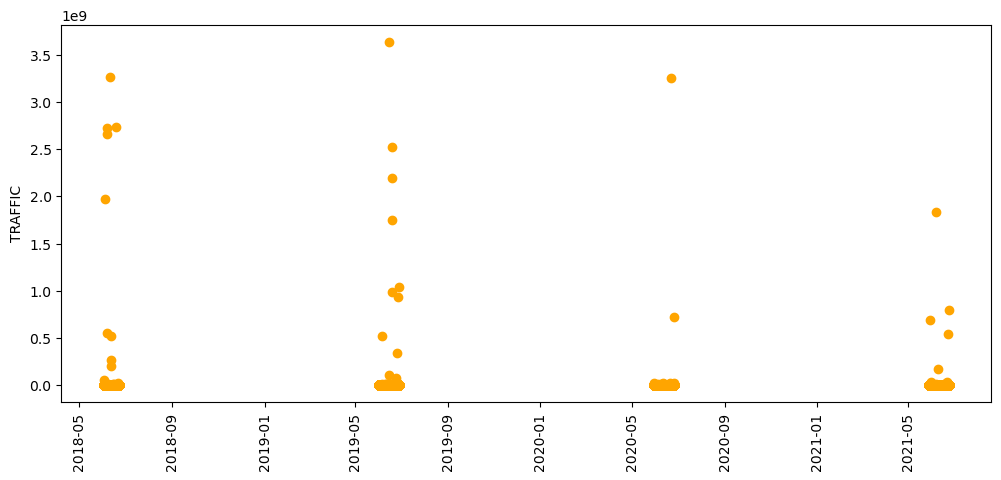

In [22]:
plt.figure(figsize=[12,5], dpi=100)
plt.scatter(mta_entry_exit['DATE'],mta_entry_exit['TRAFFIC'], c='orange')
plt.ylabel("TRAFFIC")
plt.xticks(rotation = 90)
plt.show()

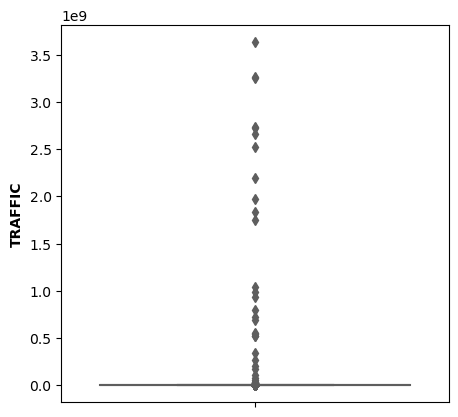

In [23]:
plt.figure(figsize=[5,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["TRAFFIC"], palette=('Oranges'))
plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
plt.show()

In [24]:
def extract_whiskers(data):
    median_value = np.median(data) #Median
    upper_quartile = np.percentile(data, 75) #75% percent
    lower_quartile = np.percentile(data, 25) #25% percent

    iqr = upper_quartile - lower_quartile #Interquartile Range
    
    print("Upper Whisker:", data[data<=upper_quartile+1.5*iqr].max()) #Max Acceptable Value
    print("Lower Whisker:", data[data>=lower_quartile-1.5*iqr].min()) #Min Acceptable Value

In [25]:
extract_whiskers(mta_entry_exit['TRAFFIC'])

Upper Whisker: 3479
Lower Whisker: 0


In [26]:
#quantile90th = mta_entry_exit['TRAFFIC'].quantile(0.9)
#quantile90th

In [27]:
mta_entry_exit['TRAFFIC'].median()

598.0

In [28]:
mta_entry_exit['TRAFFIC'][mta_entry_exit['TRAFFIC'] > 3479] = mta_entry_exit['TRAFFIC'].median()
mta_entry_exit.drop(mta_entry_exit[mta_entry_exit['TRAFFIC'] == 0].index, inplace=True)

/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_24160/1215374985.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mta_entry_exit['TRAFFIC'][mta_entry_exit['TRAFFIC'] > 3479] = mta_entry_exit['TRAFFIC'].median()


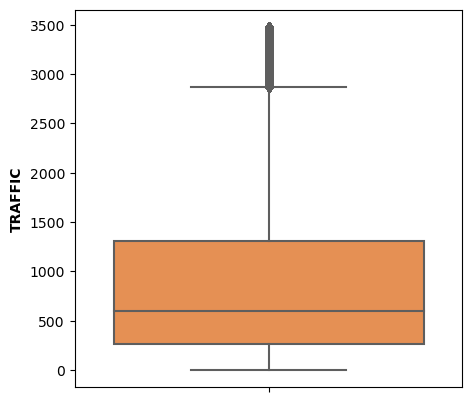

In [29]:
plt.figure(figsize=[5,5], dpi=100)
ax = sns.boxplot(y=mta_entry_exit["TRAFFIC"], palette=('Oranges'))
plt.ylabel("TRAFFIC",fontsize=10,fontweight="bold")
plt.show()

In [30]:
mta_stations_by_year = mta_entry_exit.groupby(['STATION','YEAR']).sum()
mta_stations_by_year = mta_stations_by_year.reset_index()
mta_stations_by_year

,STATION,YEAR,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,1 AV,2018,354931,391362,243684
1,1 AV,2019,364072,416819,373559
2,1 AV,2020,64409,101039,165448
3,1 AV,2021,174252,306073,480325
4,103 ST,2018,580201,363754,521811
...,...,...,...,...,...
1508,YORK ST,2021,89029,122070,114650
1509,ZEREGA AV,2018,46330,38895,85225
1510,ZEREGA AV,2019,61765,53115,114880
1511,ZEREGA AV,2020,13089,14812,27901


In [31]:
mta_stations_year_pivot = mta_stations_by_year.pivot('STATION','YEAR','TRAFFIC').sample(20)

Text(0.5, 1.0, 'COVID-19 Effect on MTA Traffic')

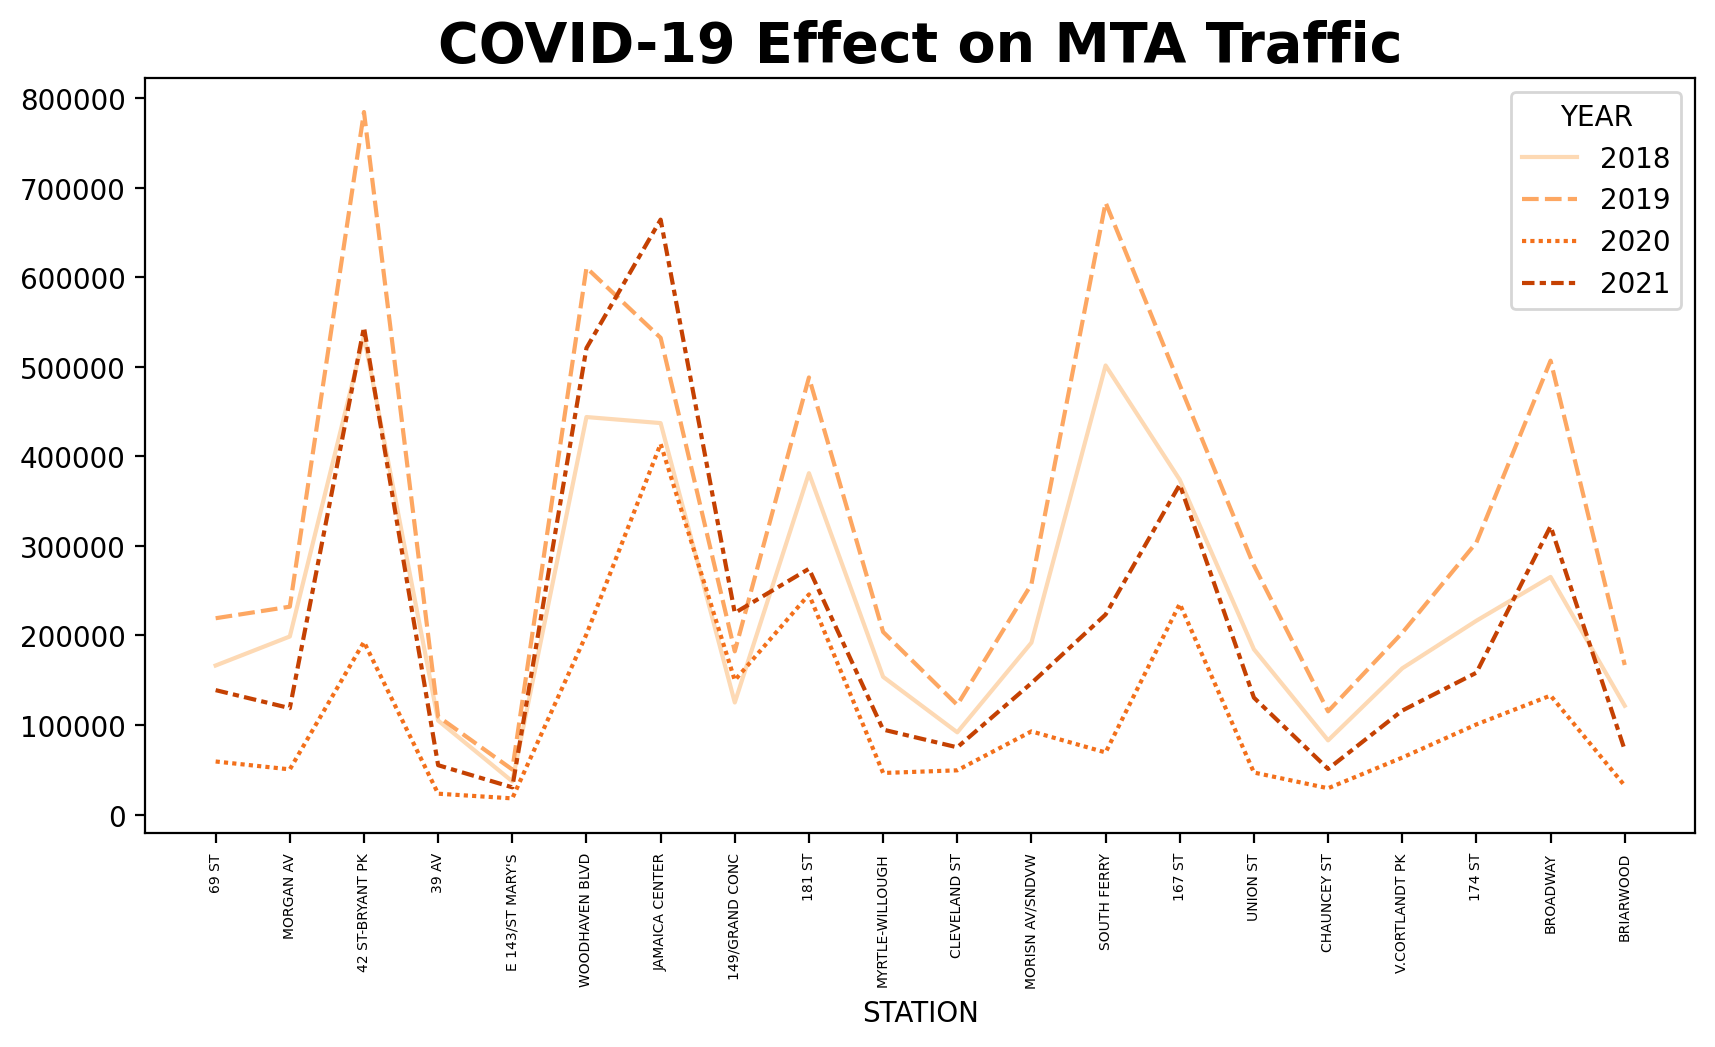

In [32]:
plt.figure(figsize=[10,5], dpi=200)
sns.lineplot(data=mta_stations_year_pivot, palette='Oranges')
plt.xticks(rotation=90, fontsize=5)
plt.title("COVID-19 Effect on MTA Traffic", fontweight='bold', fontsize=20)

In [33]:
mta_top_10 = mta_entry_exit.groupby(['STATION'])['ENTRIES_DIFF','EXITS_DIFF','TRAFFIC'].sum().sort_values('TRAFFIC', ascending=False).head(10)
mta_top_10 = mta_top_10.reset_index()
print(mta_top_10)

           STATION  ENTRIES_DIFF  EXITS_DIFF   TRAFFIC
0   34 ST-PENN STA       7986205     7743403  10151938
1        FULTON ST       7949580    12064932   7485354
2            23 ST       9248585     7528592   6950797
3            86 ST       4826431     4365055   6143611
4  GRD CNTRL-42 ST      15173634    13498974   6103760
5  34 ST-HERALD SQ       6342864     6482922   5844529
6         CANAL ST    2118435031   625541258   5711227
7           125 ST       4257758     3766399   5554082
8            59 ST       3266334     3186380   5293299
9  42 ST-PORT AUTH     104055494     8880373   5174351


/var/folders/z_/3w2qrb3n4918xqkyg__qlf6h0000gn/T/ipykernel_24160/4219918376.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  mta_top_10 = mta_entry_exit.groupby(['STATION'])['ENTRIES_DIFF','EXITS_DIFF','TRAFFIC'].sum().sort_values('TRAFFIC', ascending=False).head(10)


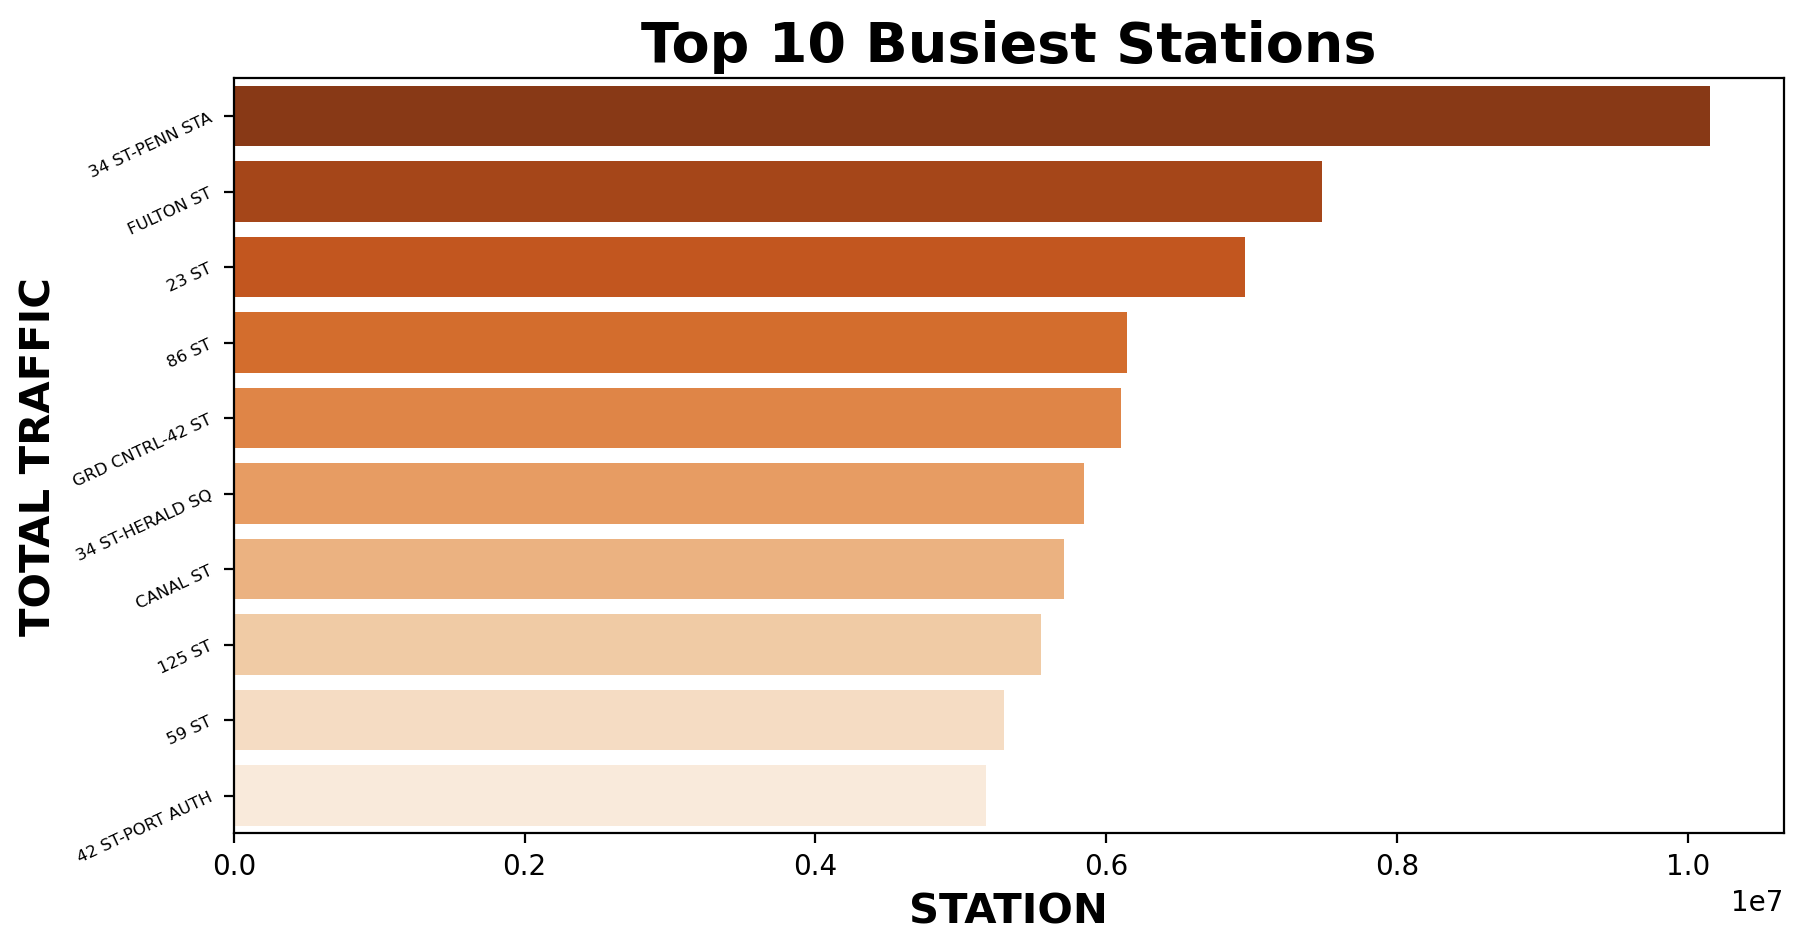

In [34]:
plt.figure(figsize=[10,5], dpi=200)
ax = sns.barplot(x = 'TRAFFIC',y = 'STATION',data = mta_top_10,orient='h',palette=("Oranges_r"))
plt.title('Top 10 Busiest Stations', weight="bold", fontsize=20)
plt.ylabel('TOTAL TRAFFIC',fontsize=15,fontweight="bold")
plt.xlabel('STATION',fontsize=15,fontweight="bold")
plt.yticks(rotation=25, fontsize=6)
plt.xticks(fontsize=10)
#ax.bar_label(ax.containers[0]) 
plt.show()

In [35]:
top_10_stations = [] 
for ind in mta_top_10.index:
    top_10_stations.append(mta_top_10['STATION'][ind])
print(top_10_stations)

['34 ST-PENN STA', 'FULTON ST', '23 ST', '86 ST', 'GRD CNTRL-42 ST', '34 ST-HERALD SQ', 'CANAL ST', '125 ST', '59 ST', '42 ST-PORT AUTH']


In [36]:
mta_top_10_by_year = mta_entry_exit[mta_entry_exit['STATION'].isin(top_10_stations)].groupby(['STATION','YEAR']).sum().sort_values('TRAFFIC', ascending=False)
mta_top_10_by_year = mta_top_10_by_year.reset_index() 
mta_top_10_by_year.head(10)

,STATION,YEAR,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,34 ST-PENN STA,2019,3800863,3472659,4052556
1,FULTON ST,2019,3522468,5608285,3168714
2,23 ST,2019,6507851,5041843,2908724
3,34 ST-PENN STA,2018,2762744,2392770,2865789
4,FULTON ST,2018,1650970,1405839,2498784
5,CANAL ST,2019,2299439,2142215,2457701
6,34 ST-PENN STA,2021,1059221,1413434,2405676
7,86 ST,2019,1894723,1712410,2380416
8,GRD CNTRL-42 ST,2019,4892512,4091556,2270813
9,59 ST,2019,1395042,1302000,2049609


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '34 ST-PENN STA'),
  Text(1, 0, 'FULTON ST'),
  Text(2, 0, '23 ST'),
  Text(3, 0, 'CANAL ST'),
  Text(4, 0, '86 ST'),
  Text(5, 0, 'GRD CNTRL-42 ST'),
  Text(6, 0, '59 ST'),
  Text(7, 0, '34 ST-HERALD SQ'),
  Text(8, 0, '42 ST-PORT AUTH'),
  Text(9, 0, '125 ST')])

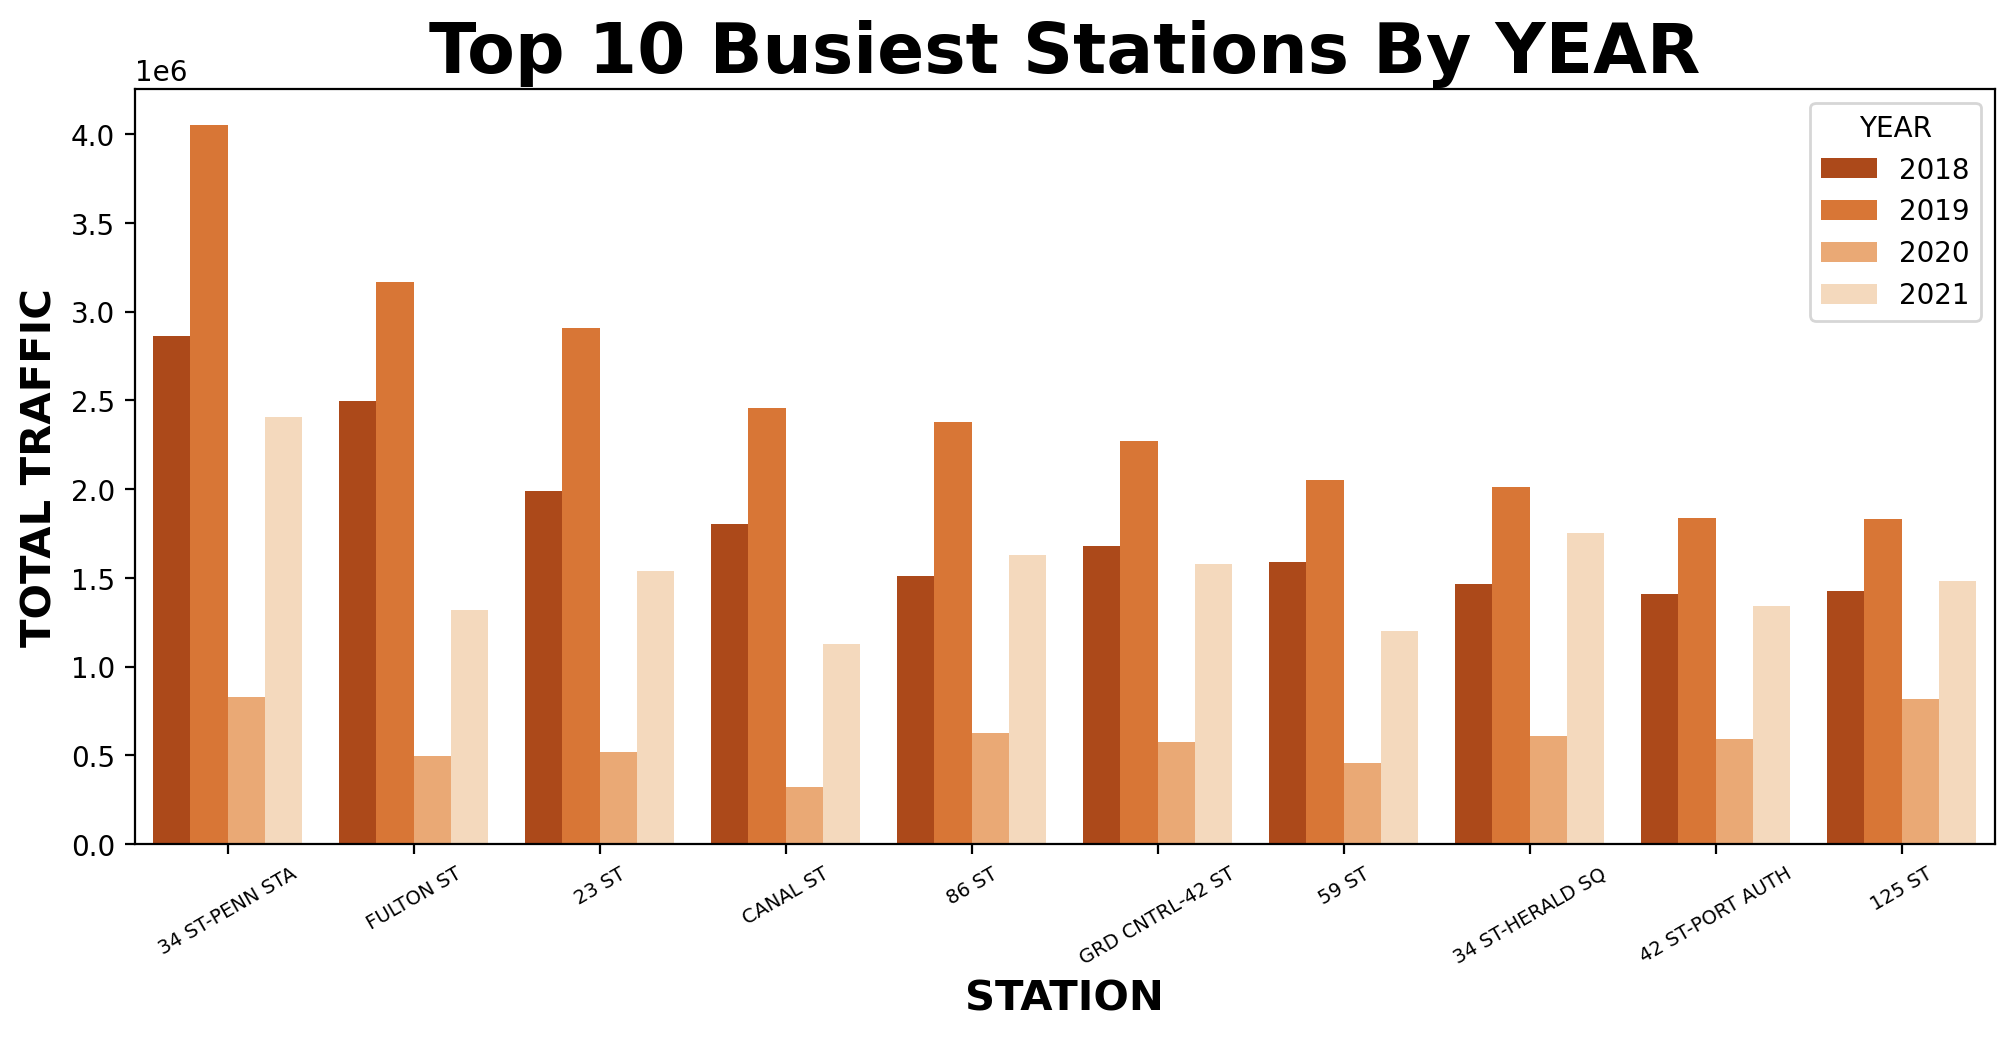

In [37]:
plt.figure(figsize=[12,5], dpi=200)
ax = sns.barplot(x = 'STATION',y = 'TRAFFIC',hue="YEAR",data = mta_top_10_by_year,palette=("Oranges_r"))
plt.title('Top 10 Busiest Stations By YEAR', weight="bold", fontsize=25)
plt.ylabel('TOTAL TRAFFIC',fontsize=15,fontweight="bold")
plt.xlabel('STATION',fontsize=15,fontweight="bold")
plt.xticks(rotation=30, fontsize=7)

In [38]:
mta_top_days = mta_entry_exit.groupby(['DAY']).sum().sort_values(['TRAFFIC'], ascending=False)
mta_top_days = mta_top_days.reset_index()
mta_top_days

,DAY,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,Wednesday,3022333927,3624745922,67221240
1,Thursday,5209179020,3088436820,67201937
2,Friday,3538513031,2930095598,67028324
3,Tuesday,935425624,1619289034,66594776
4,Monday,6166318081,4582237758,64542872
5,Saturday,55052607,56764451,46051748
6,Sunday,1531620660,1863114117,38404602


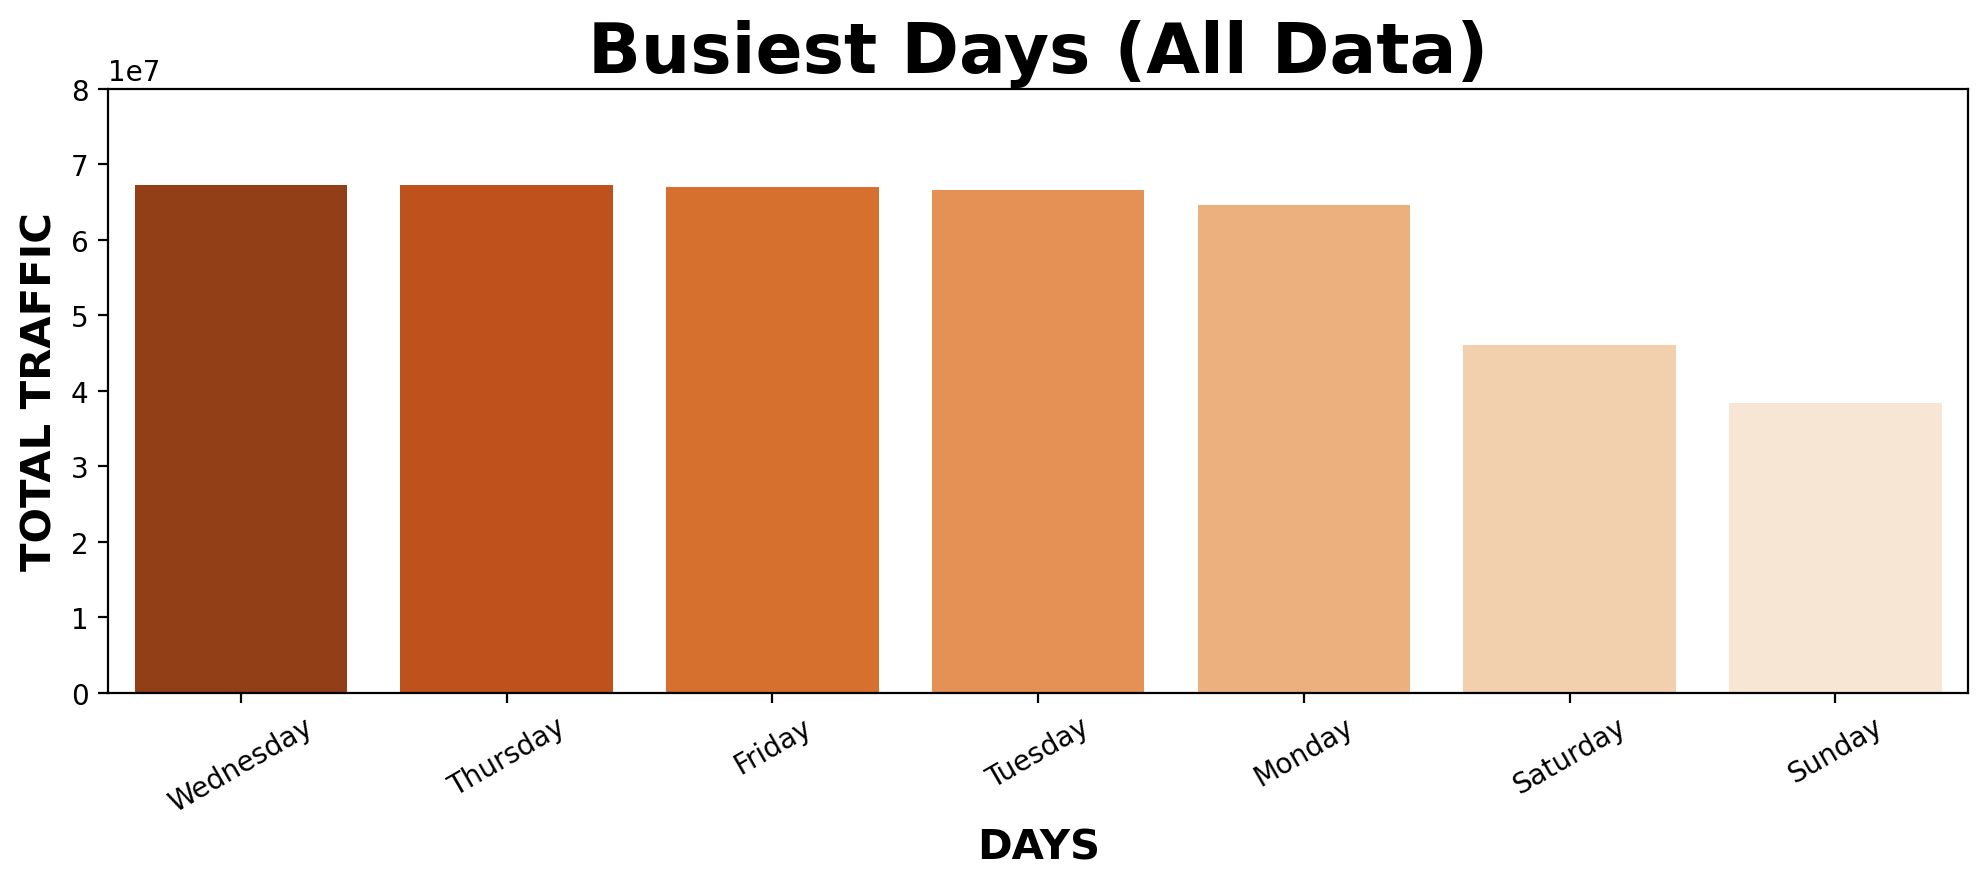

In [39]:
plt.figure(figsize=[12,4], dpi=200)
ax = sns.barplot(x = 'DAY',y = 'TRAFFIC',data = mta_top_days,palette=("Oranges_r"))
plt.title('Busiest Days (All Data)', weight="bold", fontsize=25)
plt.ylabel('TOTAL TRAFFIC',fontsize=15,fontweight="bold")
plt.xlabel('DAYS',fontsize=15,fontweight="bold")
plt.xticks(rotation=30)
plt.axis(ymin=0, ymax=8*10**7);

In [40]:
mta_top_stations_by_day = mta_entry_exit[mta_entry_exit.STATION.isin(top_10_stations)]
mta_top_stations_by_day = mta_top_stations_by_day.groupby(['DAY','STATION']).sum().sort_values('TRAFFIC',ascending=False)
mta_top_stations_by_day = mta_top_stations_by_day.reset_index()

mta_top_stations_by_day.head(5)

,DAY,STATION,ENTRIES_DIFF,EXITS_DIFF,TRAFFIC
0,Friday,34 ST-PENN STA,1286139,1318653,1601802
1,Wednesday,34 ST-PENN STA,1376958,1309854,1571536
2,Thursday,34 ST-PENN STA,1392880,1326614,1571097
3,Tuesday,34 ST-PENN STA,1384282,1298792,1556070
4,Monday,34 ST-PENN STA,1329173,1215367,1508916


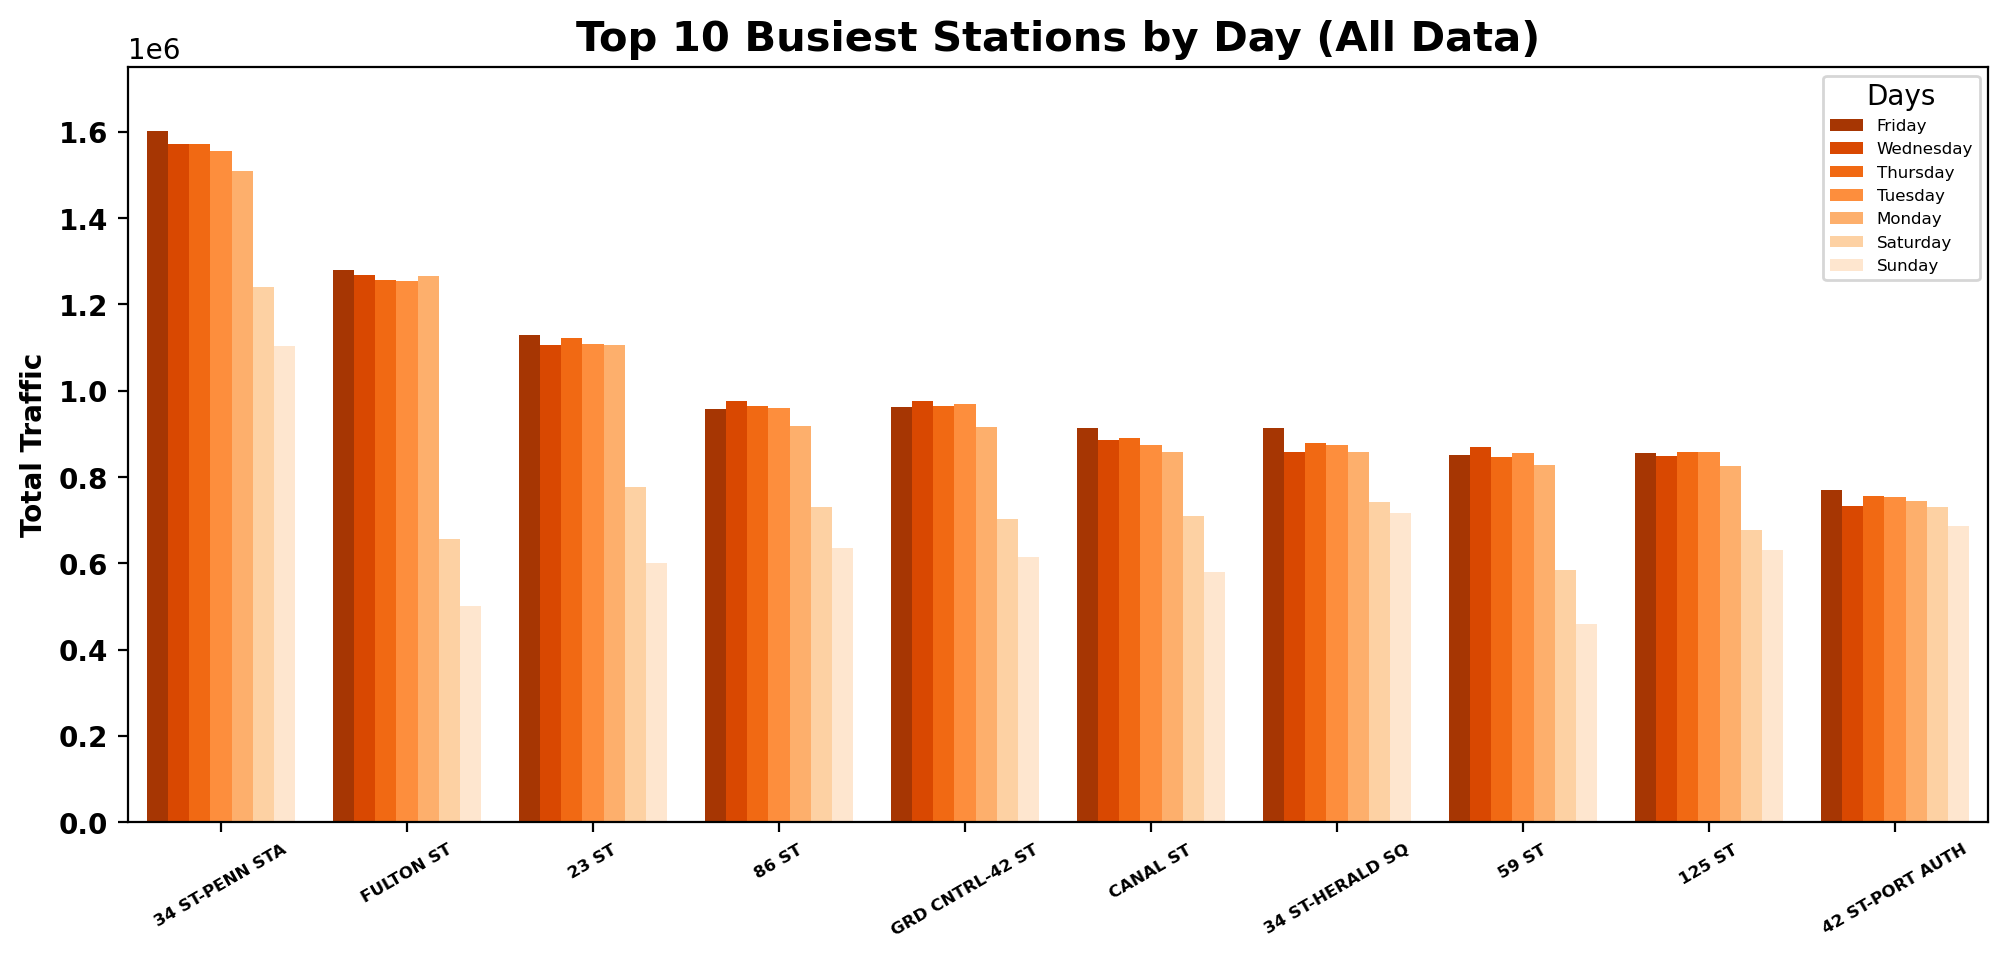

In [41]:
plt.figure(figsize=[12,5], dpi=200)
ax = sns.barplot(x="STATION", y="TRAFFIC", hue="DAY",data=mta_top_stations_by_day, saturation=1,palette=("Oranges_r"))
plt.title("Top 10 Busiest Stations by Day (All Data)", weight="bold", fontsize=15)
plt.xlabel("",weight="bold",c="k")
plt.xticks(rotation=30, weight="bold",fontsize=6)
plt.ylabel("Total Traffic",weight= "bold",c="k")
plt.yticks(weight="bold")
plt.legend(title="Days", prop={'size': 6})
plt.axis(ymin=0, ymax=1.75*10**6);

In [42]:
mta_top_stations_day_heatmap = mta_top_stations_by_day.pivot('DAY','STATION','TRAFFIC')
mta_top_stations_day_heatmap

STATION,125 ST,23 ST,34 ST-HERALD SQ,34 ST-PENN STA,42 ST-PORT AUTH,59 ST,86 ST,CANAL ST,FULTON ST,GRD CNTRL-42 ST
DAY,,,,,,,,,,
Friday,855117,1130123,913672,1601802,769310,850766,958655,913945,1281039,962309
Monday,825775,1105319,857846,1508916,744441,827614,917896,858705,1265910,915909
Saturday,677858,777825,742879,1239605,731471,584001,731468,710030,656395,702872
Sunday,630220,600785,717781,1102912,685784,459012,635355,580060,502142,615269
Thursday,857754,1122681,878591,1571097,756455,847264,964683,890169,1257542,963808
Tuesday,858524,1108066,874775,1556070,754791,855033,959575,873546,1254973,968177
Wednesday,848834,1105998,858985,1571536,732099,869609,975979,884772,1267353,975416


Text(0.5, 1.0, 'Top 10 Busiest Stations / Day')

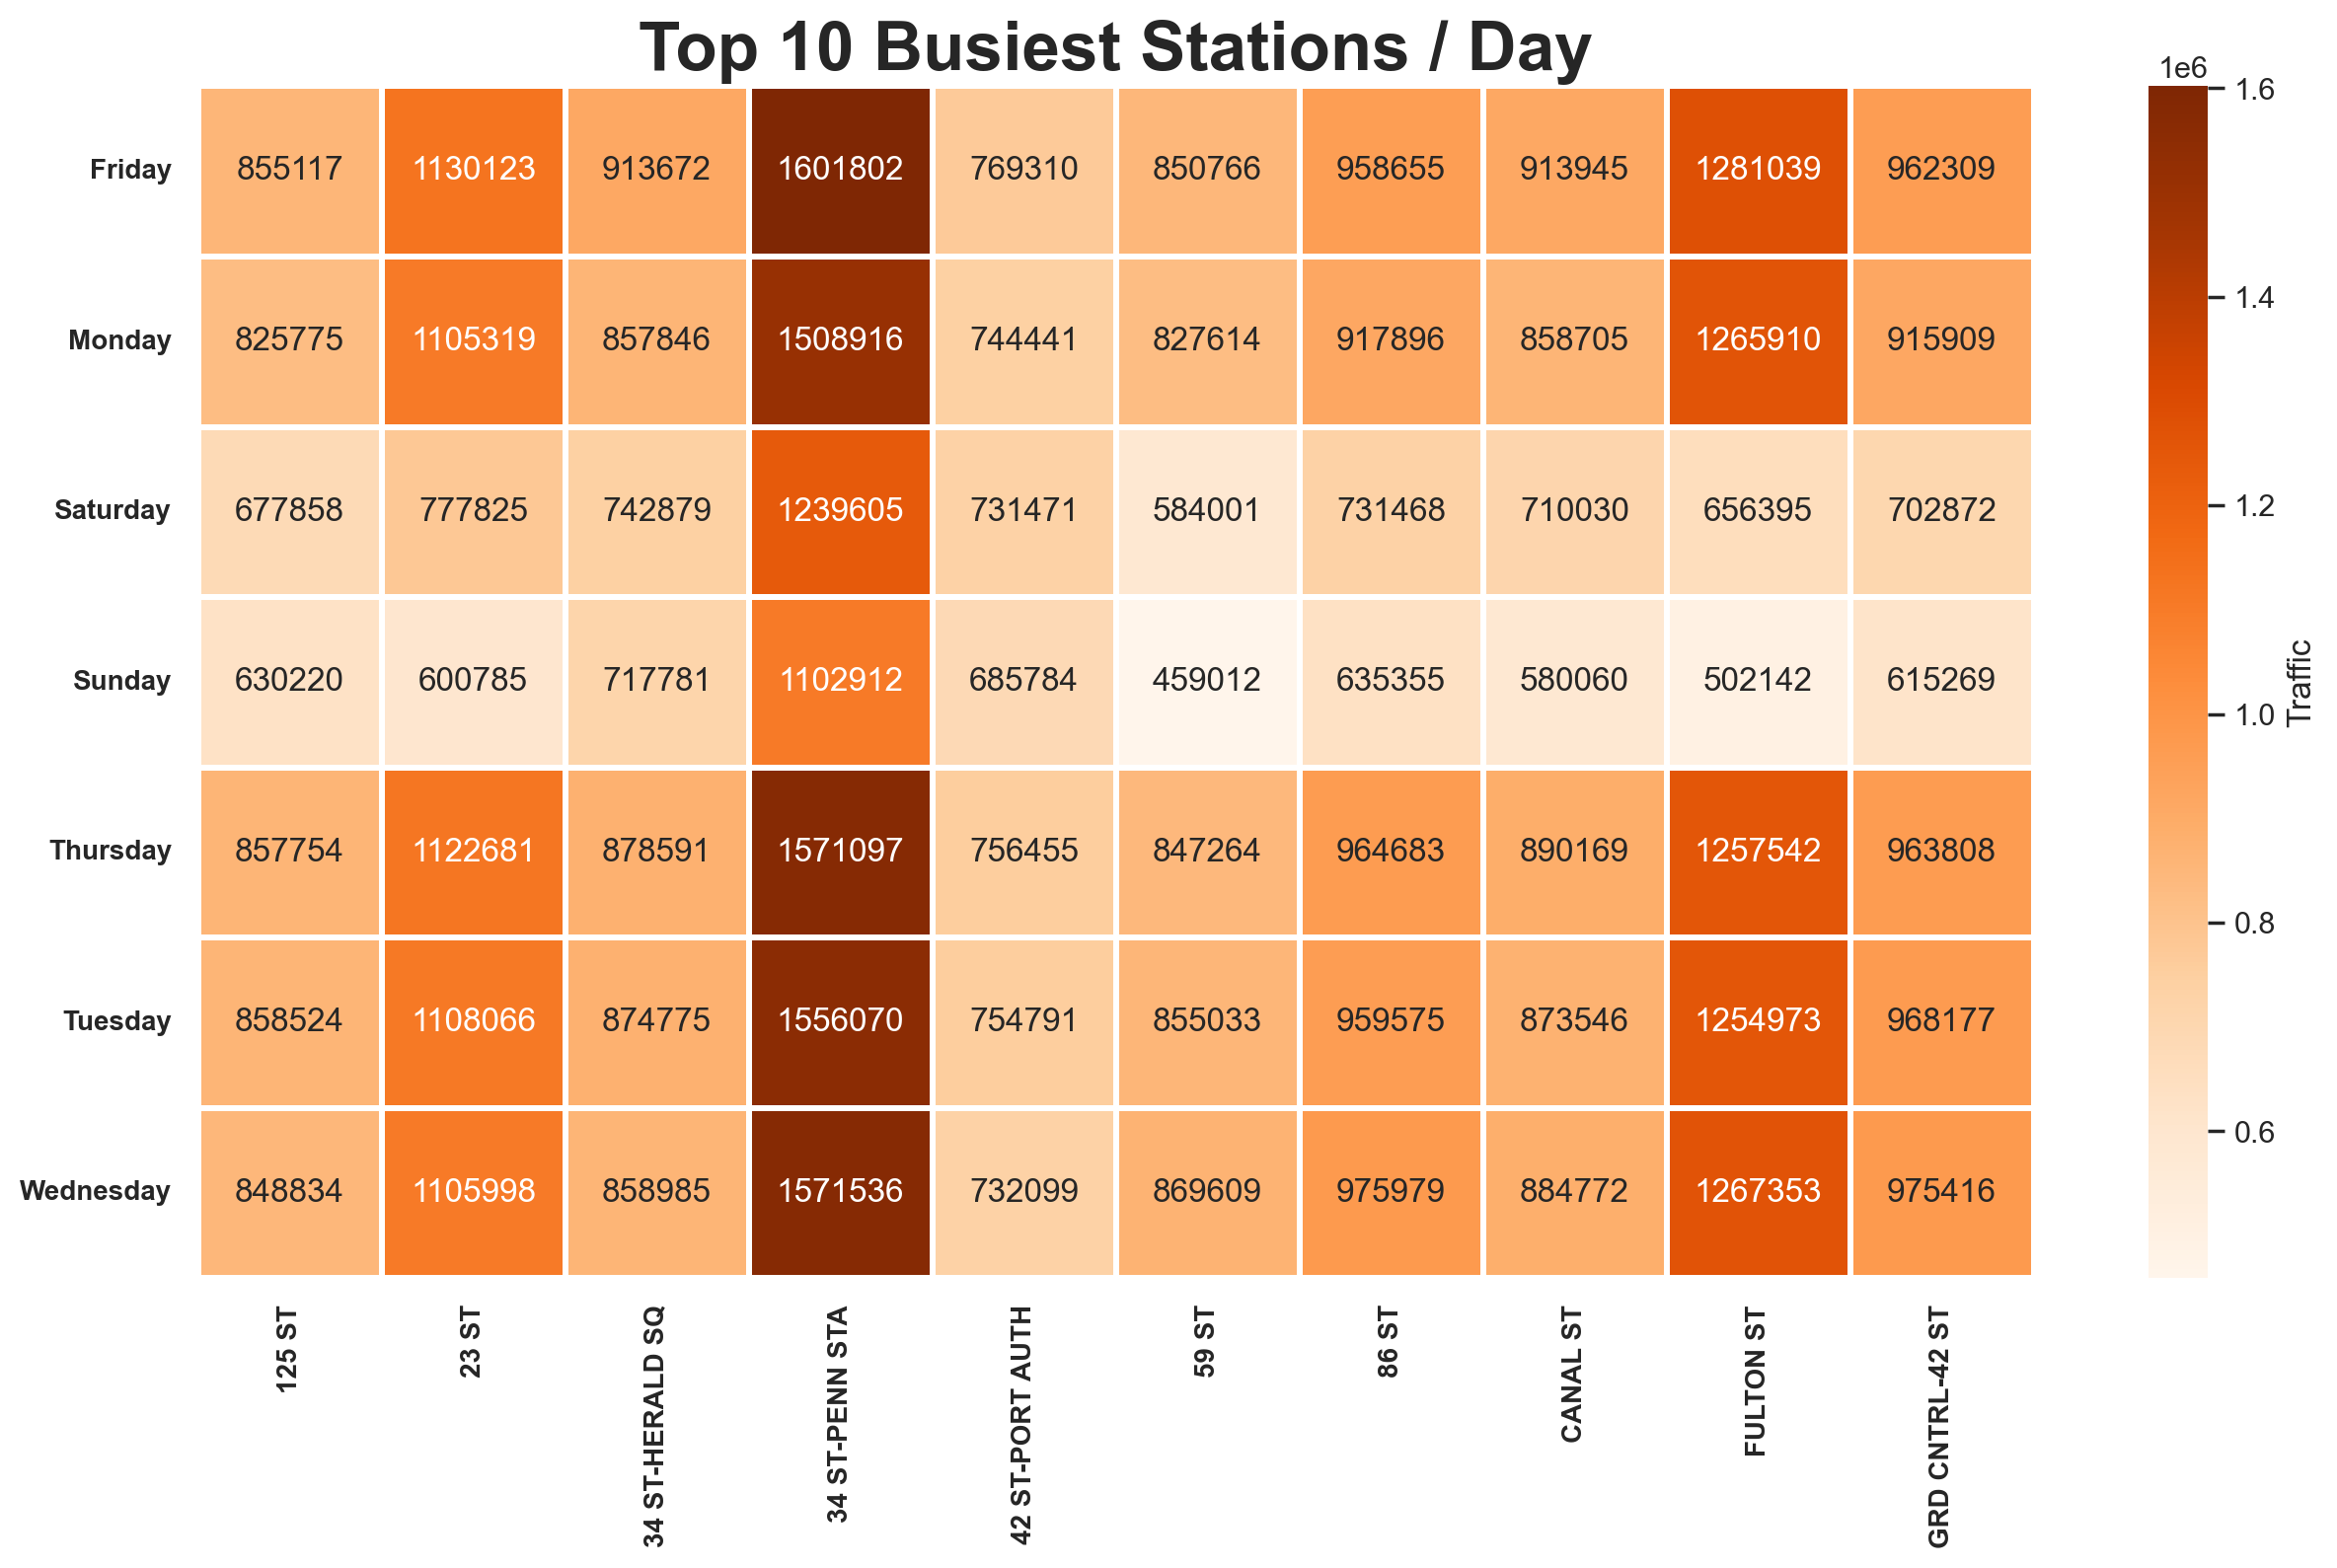

In [43]:
plt.figure(figsize=(15,8),dpi=200)
sns.set(font_scale=1)
sns.heatmap(mta_top_stations_day_heatmap,annot=True,fmt="d", linewidths=2, cmap="Oranges",cbar_kws={'label': 'Traffic'})
plt.ylabel("")
plt.xlabel("")
plt.yticks(weight="bold",rotation=0, size=10)
plt.xticks(weight="bold",rotation=90,size=10)
plt.title("Top 10 Busiest Stations / Day",weight="bold",fontsize=25)